In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

pd.set_option('display.max_columns', None)


Objective: Build a machine learning model that will help the company identify people who are more likely to donate

# Importing the datasets

In [2]:
numerical = pd.read_csv('numerical.csv')
print("numerical: ", numerical.shape)

categorical = pd.read_csv('categorical.csv')
print("categorical: ", categorical.shape)

targets = pd.read_csv('target.csv')
print("targets: ", targets.shape)

numerical:  (95412, 315)
categorical:  (95412, 22)
targets:  (95412, 2)


* Verifying the types of the columns in numerical and categorical

In [3]:
numerical.select_dtypes('number')
# all columns ahev been returned
# all columns have a correct number type

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [4]:
categorical.dtypes
# some columns have an int type and should be converted to object type

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [5]:
# correcting the types for categorical variables

int_col= categorical.select_dtypes('int64')
col_names = int_col.columns.tolist()

for col in col_names:
    categorical[col]=categorical[col].astype('object')
    
categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

# Train-test split

In [6]:
# setting our target as TARGET_B and our features as numerical+categorical
y = targets["TARGET_B"]
X = pd.concat([numerical, categorical], axis=1)
print(y.shape)
print(X.shape)

(95412,)
(95412, 337)


In [7]:
# separating the data using a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# and resetting the index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [8]:
# separate X_train and X_test into numerical and categorical
def split_num_cat(df):
    df_num = df.select_dtypes(include=np.number)
    df_cat = df.select_dtypes(include=object)
    return df_num, df_cat

X_train_num, X_train_cat = split_num_cat(X_train)
X_test_num, X_test_cat = split_num_cat(X_test)

print(X_train_num.shape)
print(X_train_cat.shape)

(76329, 315)
(76329, 22)


### Treating our numerical

In [9]:
#looking at the statistical parameters of our data
X_train_num.describe().T
    # we can see that there is a difference in the scale of values for different columns so we'll need to scale the data

,count,mean,std,min,25%,50%,75%,max
TCODE,76329.0,53.920214,959.400501,0.000000,0.000000,1.000000,2.000000,72002.0
AGE,76329.0,61.618528,14.457606,1.000000,52.000000,61.611649,72.000000,98.0
INCOME,76329.0,4.133973,1.699661,1.000000,3.000000,5.000000,5.000000,7.0
WEALTH1,76329.0,7.061654,2.699342,0.000000,5.000000,9.000000,9.000000,9.0
HIT,76329.0,3.282828,9.079672,0.000000,0.000000,0.000000,3.000000,241.0
...,...,...,...,...,...,...,...,...
AVGGIFT,76329.0,13.331892,10.809786,1.285714,8.390244,11.625000,15.454545,1000.0
CONTROLN,76329.0,95939.952286,55240.865304,1.000000,48235.000000,95945.000000,143691.000000,191779.0
HPHONE_D,76329.0,0.500662,0.500003,0.000000,0.000000,1.000000,1.000000,1.0
RFA_2F,76329.0,1.911685,1.073080,1.000000,1.000000,2.000000,3.000000,4.0


In [10]:
# Scaling/Normalizing the data

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
display(X_train_scaled.describe().T)
    #data has been successfully scaled between 0 and 1

#applying the transformer to our test set
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)


,count,mean,std,min,25%,50%,75%,max
TCODE,76329.0,0.000749,0.013325,0.0,0.000000,0.000014,0.000028,1.0
AGE,76329.0,0.624933,0.149047,0.0,0.525773,0.624862,0.731959,1.0
INCOME,76329.0,0.522329,0.283277,0.0,0.333333,0.666667,0.666667,1.0
WEALTH1,76329.0,0.784628,0.299927,0.0,0.555556,1.000000,1.000000,1.0
HIT,76329.0,0.013622,0.037675,0.0,0.000000,0.000000,0.012448,1.0
...,...,...,...,...,...,...,...,...
AVGGIFT,76329.0,0.012062,0.010824,0.0,0.007114,0.010353,0.014187,1.0
CONTROLN,76329.0,0.500260,0.288046,0.0,0.251510,0.500287,0.749252,1.0
HPHONE_D,76329.0,0.500662,0.500003,0.0,0.000000,1.000000,1.000000,1.0
RFA_2F,76329.0,0.303895,0.357693,0.0,0.000000,0.333333,0.666667,1.0


### Treating our categorical data

In [11]:
# Encoding our data with OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown ='ignore').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
display(onehot_encoded)

#applying encoder on our test set:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,DOB_YR_1,DOB_YR_2,DOB_YR_4,DOB_YR_5,DOB_YR_6,DOB_YR_7,DOB_YR_8,DOB_YR_9,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_86,DOB_YR_87,DOB_YR_89,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,FIRSTDATE_YR_49,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

C:\Users\nolwe\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11, 12, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Concatenating numerical and categorical into treated df

In [12]:
# Concatenating our numerical and categorical data:

X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)
display(X_train_treated)
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,DOB_YR_1,DOB_YR_2,DOB_YR_4,DOB_YR_5,DOB_YR_6,DOB_YR_7,DOB_YR_8,DOB_YR_9,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_86,DOB_YR_87,DOB_YR_89,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,M

# Building a classification model without further improving our dataset

In [13]:
# building the model and training it on our train set
classification = LogisticRegression(random_state=42, solver='saga', max_iter=1000)
classification.fit(X_train_treated, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

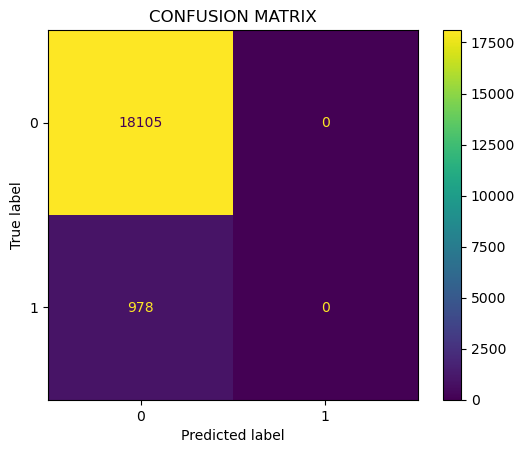

accuracy:  0.9487501965099827
precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\nolwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
predictions = classification.predict(X_test_treated)

#Visualizing our predictions using a confusion matrix:
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("accuracy: ",accuracy_score(y_test,predictions))
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))

We can see that our model did not predict any Target_B == 1 that is due to the fact that our dataset is imbalanced so to correct that I'll oversample the rows with Target_B == 1. I'll also take this opportunity to select features based on the variance of the X_train_scaled dataset I will not do feature selection on the categorical variables as there are only 22 of them.

# Dealing with data imbalance

In [15]:
y.value_counts()
    # there is a clear imbalance towards 0 (people who didn't donate after the mailing)

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

## Feature selection

* Selecting numerical columns based on their variability

In [16]:
# setting a variance threshold
var_threshold = 0.02
select = VarianceThreshold(threshold=(var_threshold))

# filtering based on the threshold
select = select.fit(X_train_scaled)
selected = select.transform(X_train_scaled)
X_train_selected = pd.DataFrame(selected)
print(X_train_selected.shape)
print((X_train_scaled.shape[1] - X_train_selected.shape[1]), " columns were removed")

(76329, 79)
236  columns were removed


In [17]:
# Checking the columns that have been dropped before dropping them in X_test_scaled dataset
var_list = list(select.get_support())
col_to_drop = [col[0] for col in zip(X_train_scaled.columns, var_list) if col[1] == False]
print(col_to_drop)

['TCODE', 'HIT', 'MALEMILI', 'MALEVET', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C4', 'POP90C5', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HHD1', 'HHD4', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA4', 'HUPA5', 'HUPA7', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS1', '

In [18]:
# dropping the columns with low variability from X_train_scaled and X_test scaled
X_train_scaled.drop(col_to_drop, axis=1, inplace=True)
X_test_scaled.drop(col_to_drop, axis=1, inplace=True)
X_train_scaled

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.624862,0.666667,1.000000,0.363636,0.212121,1.000000,1.0,0.000000,0.000000,0.888889,0.020202,0.373737,0.313131,0.272727,0.686869,0.454545,0.313131,0.215667,0.226000,0.384615,0.384615,0.535354,0.474747,0.000000,0.666667,0.535354,0.838384,0.484848,0.080808,0.363636,0.757576,0.919192,1.000000,0.020202,0.464646,0.212121,0.000000,0.242424,0.595960,0.838384,0.969697,1.000000,0.170940,0.078341,0.303030,0.454545,0.464646,0.545455,0.010101,0.787879,0.747475,0.545455,0.898990,0.848485,1.000000,0.000000,0.060606,0.383838,0.575758,0.808081,0.343434,0.711538,0.000000,0.030303,0.070707,0.181818,0.828283,0.959596,0.020202,1.000000,0.000000,1.000000,0.285714,0.6,0.066667,0.472526,1.0,0.000000,0.426230
1,0.649485,0.500000,1.000000,0.232323,0.282828,1.000000,0.0,0.000000,1.000000,0.888889,0.010101,0.323232,0.666667,0.656566,0.050505,0.050505,0.050505,0.080500,0.111500,0.153846,0.153846,0.838384,0.171717,0.555556,0.737374,0.646465,0.858586,0.404040,0.020202,0.090909,0.191919,0.292929,0.484848,0.010101,0.161616,0.050505,0.282828,0.000000,0.030303,0.090909,0.212121,0.555556,0.000000,0.311828,0.373737,0.424242,0.444444,0.565657,0.171717,0.626263,0.555556,0.505051,0.555556,0.444444,0.525253,0.868687,0.252525,0.535354,0.646465,0.878788,0.545455,0.326923,0.090909,0.272727,0.656566,0.979798,0.030303,0.010101,0.565657,0.787879,0.222222,0.101010,0.285714,0.4,0.400000,0.098807,0.0,0.333333,0.950820
2,0.639175,1.000000,0.666667,0.272727,0.333333,1.000000,0.0,0.636364,0.373737,0.959596,0.050505,0.414141,0.808081,0.797980,0.141414,0.111111,0.080808,0.066000,0.075667,0.153846,0.153846,0.707071,0.303030,0.070707,0.737374,0.616162,0.828283,0.585859,0.000000,0.010101,0.040404,0.090909,0.272727,0.000000,0.464646,0.030303,0.060606,0.090909,0.000000,0.010101,0.111111,0.565657,0.000000,0.321045,0.333333,0.353535,0.454545,0.555556,0.060606,0.232323,0.757576,0.727273,0.747475,0.595960,0.424242,0.000000,0.272727,0.333333,0.868687,1.000000,0.545455,0.423077,0.070707,0.171717,0.444444,0.686869,0.323232,0.606061,0.282828,0.979798,0.020202,0.737374,0.428571,0.4,0.433333,0.307856,1.0,0.333333,0.852459
3,0.731959,0.166667,1.000000,0.191919,0.303030,0.555556,1.0,0.000000,0.000000,0.969697,0.010101,0.565657,0.878788,0.868687,0.131313,0.090909,0.000000,0.121833,0.127167,0.307692,0.307692,0.838384,0.171717,0.131313,0.838384,0.696970,0.919192,0.595960,0.010101,0.010101,0.101010,0.464646,0.919192,0.000000,0.575758,0.000000,0.000000,0.000000,0.202020,0.373737,0.858586,0.959596,0.547009,0.164363,0.141414,0.343434,0.353535,0.656566,0.747475,0.717172,0.797980,0.696970,0.838384,0.636364,1.000000,0.000000,0.191919,0.303030,0.868687,0.969697,0.616162,0.750000,0.090909,0.191919,0.292929,0.292929,0.717172,0.797980,0.070707,0.949495,0.060606,0.949495,0.380952,0.4,0.450000,0.429001,1.0,0.000000,0.344262
4,0.624862,0.000000,1.000000,0.464646,0.383838,0.222222,0.0,0.000000,1.000000,0.898990,0.000000,0.717172,0.515152,0.515152,0.010101,0.010101,0.010101,0.113167,0.119000,0.230769,0.230769,0.757576,0.252525,0.111111,0.858586,0.737374,0.939394,0.464646,0.000000,0.000000,0.131313,0.343434,0.828283,0.000000,0.414141,0.010101,0.474747,0.010101,0.050505,0.191919,0.595960,0.686869,0.440171,0.698925,0.121212,0.404040,0.636364,0.383838,0.020202,0.272727,0.848485,0.747475,0.575758,0.464646,0.878788,0.383838,0.474747,0.363636,0.171717,0.848485,0.757576,0.230769,0.363636,0.444444,0.757576,0.818182,0.191919,0.010101,0.838384,0.949495,0.050505,0.151515,0.095238,0.6,0.300000,0.733875,1.0,0.000000,0.688525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

* Selecting numerical columns based on the fact that they are not colinear with each other

In [19]:
#looking at the multicolinearity of the remaining columns in X_train_selected
corr_matrix=X_train_scaled.select_dtypes(include=[np.number]).corr()  # default
corr_matrix

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
AGE,1.000000,-0.199987,-0.094828,-0.140818,0.168617,-0.164537,0.004302,0.045889,-0.038078,0.033300,-0.018310,-0.181583,-0.057829,-0.055837,0.062350,0.057357,0.054939,-0.000861,0.000861,-0.021168,-0.013487,-0.038052,0.045029,0.066889,-0.111221,-0.093726,-0.086689,-0.077334,0.005858,-0.001856,-0.016376,-0.030173,-0.039654,0.014601,-0.076165,0.058243,0.002074,0.038323,-0.029239,-0.030710,-0.024764,-0.013628,0.008848,0.017517,0.095850,0.055637,-0.034129,0.042005,-0.067414,-0.092271,-0.141692,-0.137746,-0.021277,-0.041289,-0.027923,-0.051785,-0.130595,0.174269,-0.041827,0.024680,-0.126038,0.094116,-0.096406,-0.101856,-0.095187,-0.082529,0.087559,0.008771,0.007583,0.046073,-0.043974,0.059207,-0.038674,-0.019275,0.245310,-0.023536,0.080547,0.051854,0.049256
INCOME,-0.199987,1.000000,0.363198,0.074715,-0.073572,0.203388,0.104519,-0.073916,-0.070723,0.033495,-0.072540,0.097584,0.104652,0.076941,-0.051672,-0.030066,-0.015853,0.277133,0.286100,0.283907,0.271840,0.112403,-0.125550,-0.024829,0.102659,0.159140,0.060145,0.114606,0.252449,0.278050,0.308077,0.312900,0.269303,0.207962,0.231263,-0.009041,-0.104356,-0.030149,0.282607,0.266326,0.227777,0.164733,0.092134,-0.110305,-0.306814,0.217723,0.055418,-0.066902,0.053960,0.104963,0.128799,0.155545,0.016213,0.074408,0.028758,-0.020908,0.071228,-0.070126,-0.121223,-0.037929,0.211585,-0.145356,0.133745,0.133371,0.136791,0.148277,-0.156599,0.050374,0.013314,0.039905,-0.046273,0.029839,0.277859,0.170065,-0.076113,0.078072,-0.120275,-0.064354,-0.316852
WEALTH1,-0.094828,0.363198,1.000000,0.061239,-0.081223,0.256845,0.069123,-0.109275,-0.007258,0.070176,-0.101387,0.065713,0.084501,0.065248,-0.060187,-0.032358,-0.013787,0.205606,0.215103,0.213068,0.200307,0.119293,-0.145588,0.003504,0.076241,0.158553,0.035288,0.142607,0.178440,0.194608,0.230890,0.257850,0.238353,0.155032,0.216186,-0.004505,-0.075871,-0.031357,0.223865,0.214550,0.175387,0.100306,0.055234,-0.045682,-0.300437,0.217863,0.003754,-0.031597,0.053772,0.107577,0.117504,0.152488,0.038619,0.116109,0.036675,-0.000399,0.063209,-0.069301,-0.094011,-0.010130,0.212245,-0.161499,0.118606,0.127228,0.145316,0.162251,-0.179370,0.000087,0.022663,-0.008516,-0.009078,-0.017315,0.252730,0.180115,-0.067068,0.034431,-0.385418,-0.029573,-0.282239
VIETVETS,-0.140818,0.074715,0.061239,1.000000,-0.417494,0.068615,0.019408,-0.050192,0.032867,0.009465,-0.005596,0.338612,0.142389,0.143333,-0.105057,-0.094541,-0.091923,-0.024828,-0.026639,0.058253,0.059611,0.072750,-0.047005,-0.131414,0.210036,0.183905,0.180795,0.192964,-0.042697,-0.020088,0.020578,0.061210,0.102878,-0.067404,0.180873,-0.095366,-0.025977,-0.055703,0.073033,0.082778,0.095650,0.103424,0.032951,0.036606,-0.171651,-0.060477,0.140733,-0.099149,0.105546,0.165497,0.335647,0.324776,0.105854,0.131235,0.081891,0.097395,0.774993,-0.472046,0.050843,0.052182,0.269731,-0.174499,0.164396,0.199228,0.228306,0.194876,-0.173895,0.001707,0.008835,-0.020862,0.045804,-0.053625,0.075845,0.029913,-0.046547,0.067351,0.021199,-0.011462,-0.089301
WWIIVETS,0.168617,-0.073572,-0.081223,-0.417494,1.000000,-0.087921,-0.024180,0.066824,-0.006062,0.122475,-0.055931,-0.372245,-0.039433,-0.040342,0.029141,0.023524,0.025948,0.039392,0.045441,-0.023997,-0.027595,0.092553,-0.064266,0.226349,-0.124217,-0.071944,-0.061537,-0.179487,0.043833,0.026865,0.001453,-0.025351,-0.044371,0.067804,-0.099433,0.041146,0.062511,-0.036486,-0.042770,-0.053743,-0.065288,-0.063758,-0.015673,0.019847,0.165657,0.200959,-0.161335,0.205795,-0.093192,-0.123673,-0.382157,-0.360552,-0.042943,-0.060183,-0.062994,-0.116186,-0.474372,0.796517,-0.071019,0.06

In [20]:
# Extract values and row, column names
arr = corr_matrix.values
index_names = corr_matrix.index
col_names = corr_matrix.columns

#  Get indices where the correlation threshold is crossed; avoiding the diagonal elements
R,C = np.where(np.triu(arr,1)>0.85)

# Arrange everything in a dataframe
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])
df_out

,row_name,col_name,value
0,DW1,DW2,0.952182
1,DW4,DW5,0.974716
2,DW4,DW6,0.927388
3,DW4,HUPA2,0.856718
4,DW4,HUPA6,0.88894
5,DW5,DW6,0.971976
6,DW5,HUPA2,0.906384
7,DW5,HUPA6,0.926974
8,DW6,HUPA2,0.957011
9,DW6,HUPA6,0.946267


In [21]:
col_to_drop2=pd.DataFrame(df_out['col_name'].value_counts(dropna=False)).reset_index()
col_to_drop2.columns = ['col_name', 'value_count']
list_col_to_drop = list(col_to_drop2['col_name'])
print(list_col_to_drop)
print(len(list_col_to_drop))

['HUPA6', 'HVP6', 'HUPA2', 'HVP2', 'DW6', 'RP2', 'RP1', 'HVP1', 'DW2', 'HVP3', 'RP3', 'LFC4', 'HVP5', 'HVP4', 'HV4', 'DW5', 'HV2', 'HHD5', 'HHD3', 'HC8', 'HC7', 'HC5', 'RP4']
23


we can see that there are 23 multicolinear columns that we can drop

In [22]:
#dropping the columns from X_train_selected and X_test_selected

X_train_scaled.drop(list_col_to_drop, axis = 1, inplace = True)
X_test_scaled.drop(list_col_to_drop, axis = 1, inplace = True)

# checking the shape of the resulting dfs
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(76329, 56)
(19083, 56)


## Concatenating selected numerical and categorical into treated df

In [23]:
# Concatenating our selected numerical and categorical data:

X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)
display(X_train_treated)
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU2,HU5,HHD2,ETHC2,HUR2,HUPA3,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,DOB_YR_1,DOB_YR_2,DOB_YR_4,DOB_YR_5,DOB_YR_6,DOB_YR_7,DOB_YR_8,DOB_YR_9,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_86,DOB_YR_87,DOB_YR_89,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,FIRSTDATE_YR_49,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE

By selecting features have reduced the number of columns that would be analyzed by the model from 629 to 370.

## Upsampling

To rebalance the dataset I choose to upsample the rows for which TARGET_B==1

In [24]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train_treated, y_train], axis=1)
print(trainset[trainset['TARGET_B']==0].shape)

# upsampling category 1:
category_1_upsampled = trainset[trainset['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==0]), replace=True)
print(category_1_upsampled.shape)
category_0 = trainset[trainset['TARGET_B']== 0]
print(category_0.shape)
trainset_new = pd.concat([category_1_upsampled, category_0], axis = 0)

# randomizing the rows and reseparating into X and y set
trainset_new = trainset_new.sample(frac=1) #randomize the rows
X_train_treated = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
display(X_train_treated.head(5))
display(X_test_treated.head(5))


(72464, 371)
(72464, 371)
(72464, 371)


,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU2,HU5,HHD2,ETHC2,HUR2,HUPA3,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,DOB_YR_1,DOB_YR_2,DOB_YR_4,DOB_YR_5,DOB_YR_6,DOB_YR_7,DOB_YR_8,DOB_YR_9,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_86,DOB_YR_87,DOB_YR_89,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,FIRSTDATE_YR_49,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU2,HU5,HHD2,ETHC2,HUR2,HUPA3,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,ODATEW_YR_84,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,DOB_YR_1,DOB_YR_2,DOB_YR_4,DOB_YR_5,DOB_YR_6,DOB_YR_7,DOB_YR_8,DOB_YR_9,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_86,DOB_YR_87,DOB_YR_89,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,DOB_MM_10,DOB_MM_11,DOB_MM_12,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,FIRSTDATE_YR_49,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE

## Building new model based on upsampled training data

In [25]:
# building the model and training it on our train set
classification = LogisticRegression(random_state=42, solver='saga', max_iter=1000)
classification.fit(X_train_treated, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

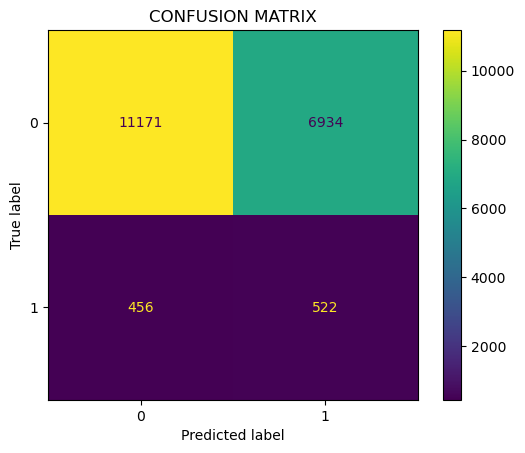

accuracy:  0.6127443274118325
precision:  0.0700107296137339
recall:  0.5337423312883436
f1:  0.1237846810528812


In [26]:
predictions = classification.predict(X_test_treated)

#Visualizing our predictions using a confusion matrix:
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("accuracy: ",accuracy_score(y_test,predictions))
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))